In [3]:
#Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read file into CSV
movies_df = pd.read_csv('./movies.csv')
movies_df=movies_df.iloc[:, 1:].set_index('ID')
movies_df.head(5)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
5,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
#Add a new column in the DataFrame for Streaming platform
movies_df['Streaming platform']=''

#Iterate through each column and add the values for each streaming platform into a single column 
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
    movies_df.loc[movies_df[each_platform]==1, 'Streaming platform']=each_platform    
movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Streaming platform
ID,,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0,Netflix
2,Dangal,2016,7+,97/100,1,0,0,0,0,Netflix
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,Netflix
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,Netflix
5,Roma,2018,18+,94/100,1,0,0,0,0,Netflix


In [6]:
#Clean the data frame by dropping redundant rows Netflix, Hulu, Prime Video, Disney+, Type
clean_movies_df=movies_df.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'])
clean_movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Streaming platform
ID,,,,,
1,The Irishman,2019,18+,98/100,Netflix
2,Dangal,2016,7+,97/100,Netflix
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,Netflix
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,Netflix
5,Roma,2018,18+,94/100,Netflix


## Question:1 Which streaming platform offers recent movies?

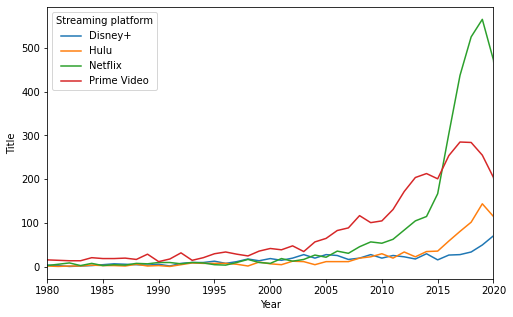

In [118]:
#Plot a line chart to see the distribution
fig=plt.figure(figsize=(8,5))
year= sns.lineplot(x=recent_movies['Year'], y=recent_movies['Title'], hue= recent_movies['Streaming platform'])
plt.xlim(1980,2020)
plt.show()

The Streaming platform that offers the most recent movies is Netflix followed by Prime video, Hulu and Disney+

## Question 2: Which streaming platform offers the highest number of movies?

In [ ]:
# Group movies by year to identify which streaming platform offers recent movies
recent_movies= clean_movies_df.groupby(['Streaming platform','Year']).count()
recent_movies.reset_index(inplace=True)
recent_movies

In [31]:
#We calculate the number of movies for each streaming platform
most_movies=clean_movies_df['Streaming platform'].value_counts().rename_axis('Streaming platform').reset_index(name='Counts')
most_movies

,Streaming platform,Counts
0,Prime Video,4100
1,Netflix,3550
2,Hulu,943
3,Disney+,922


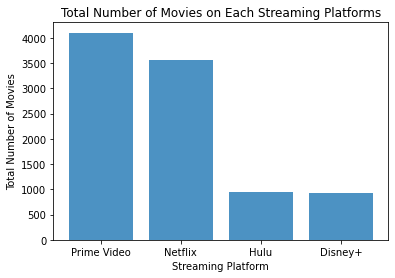

In [113]:
#plot a bargraph
plt.bar(most_movies['Streaming platform'], most_movies['Counts'],  
       alpha=0.8)
plt.xlabel('Streaming Platform')
plt.ylabel('Total Number of Movies')
plt.title('Total Number of Movies on Each Streaming Platforms')
plt.show()

## Question 3: Which Streaming platform has the highest average Rotten Tomatoes Score?

In [14]:
#Review the rotten tomatoes score for each platform.
#Split the Rotten tomatoes score and convert it to float.
movies_score=clean_movies_df['Rotten Tomatoes'].str.split('/', expand=True)

In [15]:
#Add the split value into a new column called rating and convert the values to float.
clean_movies_df['Rotten Tomatoes']=pd.to_numeric(movies_score[0])
clean_movies_df

,Title,Year,Age,Rotten Tomatoes,Streaming platform
ID,,,,,
1,The Irishman,2019,18+,98.0,Netflix
2,Dangal,2016,7+,97.0,Netflix
3,David Attenborough: A Life on Our Planet,2020,7+,95.0,Netflix
4,Lagaan: Once Upon a Time in India,2001,7+,94.0,Netflix
5,Roma,2018,18+,94.0,Netflix
...,...,...,...,...,...
9511,Most Wanted Sharks,2020,NaN,14.0,Disney+
9512,Doc McStuffins: The Doc Is In,2020,NaN,13.0,Disney+
9513,Ultimate Viking Sword,2019,NaN,13.0,Disney+


In [131]:
movies_df_groupby=clean_movies_df.groupby(["Streaming platform"])
movies_score_df=movies_df_groupby['Rotten Tomatoes'].mean().sort_values(ascending=False).rename_axis('Streaming platform').reset_index(name='Counts')
movies_score_df

,Streaming platform,Counts
0,Hulu,60.262990
1,Disney+,58.312364
2,Netflix,54.179509
3,Prime Video,50.379512


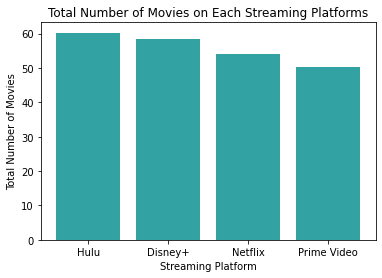

In [132]:
#Draw a bar graph to show which streaming platform has the highest average Rating
plt.bar(movies_score_df['Streaming platform'], movies_score_df['Counts'],  
       alpha=0.8, 
       color='darkcyan')
plt.xlabel('Streaming Platform')
plt.ylabel('Total Number of Movies')
plt.title('Total Number of Movies on Each Streaming Platforms')
plt.show()

We can see from the bar chart that hulu has the highest avearge rating.

## Advanced Analysis: Movie Quantity and Age 

In [82]:
#group by Age and streaming platform to aggregate the count of movies for each streaming platform based on age
ratings_df = clean_movies_df.groupby(['Age', 'Streaming platform']).count()
ratings_df.reset_index(inplace=True)

#Adjust the order to make it in chronological order
from pandas.api.types import CategoricalDtype
order = CategoricalDtype(['all', '7+', '13+', '16+', '18+'], ordered=True)
ratings_df['Age'] = ratings_df['Age'].astype(order)
ratings_df.sort_values('Age')
ratings_df.reset_index(inplace=True)
ratings_df.head()

,index,Age,Streaming platform,Title,Year,Rotten Tomatoes
0,0,13+,Disney+,70,70,70
1,1,13+,Hulu,161,161,161
2,2,13+,Netflix,372,372,372
3,3,13+,Prime Video,395,395,395
4,4,16+,Disney+,4,4,4


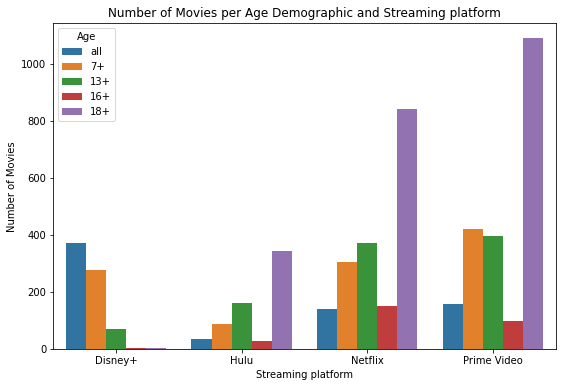

In [83]:
#Plot a graph to see how many movies per age demographic are offered on each streaming platform 
fig=plt.figure(figsize=(9,6))
sns.barplot(x = 'Streaming platform', y = 'Title', hue = 'Age', data = ratings_df)
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Age Demographic and Streaming platform')
plt.show()

The streaaming platform that offers the most movies for 18+ is Prime Video, Netflix and Hulu respectively. Disney+ offers the highest number of movies for all age demographics. 

## Advanced Analysis: Movie Rating and Movie Quantity

[]

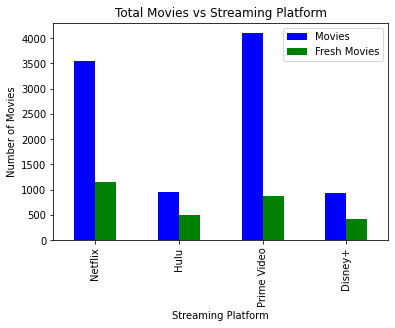

In [10]:
grouped_df = movies_df.groupby('Streaming platform')

sum_plot_data = []
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    sum_plot_data.append(movies_df['Streaming platform'].value_counts()[each_platform])

good_sum_plot_data = []
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    new_data = []
    for index, row in grouped_df.get_group(each_platform).iterrows():
        if (len(str(row['Rotten Tomatoes']).split('/'))==2):
            score = float(row['Rotten Tomatoes'].split('/')[0])
            if (score >= 60):
                new_data.append(score)
    good_sum_plot_data.append(len(new_data))

df = pd.DataFrame()
df['Streaming Platform'] = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
df['Sum'] = sum_plot_data
df['Sum_Fresh'] = good_sum_plot_data

ax = df.plot(x="Streaming Platform", y=["Sum","Sum_Fresh"], kind="bar", color={"Sum": "blue", "Sum_Fresh": "green"})
ax.set_ylabel("Number of Movies")
ax.legend(labels=["Movies", "Fresh Movies"], loc="upper right")
plt.title("Total Movies vs Streaming Platform")

plt.plot()

## Conclusion

From our analysis, we were able to discern that Prime Video offers the highest number of movies but has lower average rotten tomatoes score compared to the other streaming platforms. We found that Hulu has the highest average Rotten Tomatoes score. Lastly, we found that Netflix offers the most recent movies compared to other streaming platforms.